<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/12_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


## Tutorial original: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas.

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70.000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Usaremos 60.000 imagens para treinar nossa rede e 10.000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores de pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [ ]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [ ]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

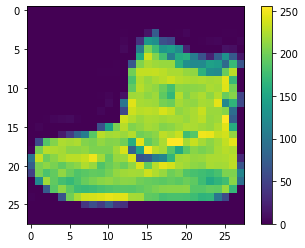

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Como os dados são realmente
print(train_images[0]) 
#Os dados estão no formato(M, N), ou seja, uma imagem com dados escalares. 
#Os valores são mapeados para cores pelo matplotlib usando normalização e um mapa de cores. 

#veja mais em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Fazemos a reescala desses valores para o intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. 

É importante que o *conjunto de treinamento* e o *conjunto de teste* sejam pré-processados do mesmo modo, pois para o TensorFlow os números estão entre 0 e 1, sendo a saída um número entre 0 e 1.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
print(train_images[0]) #[0;1]

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

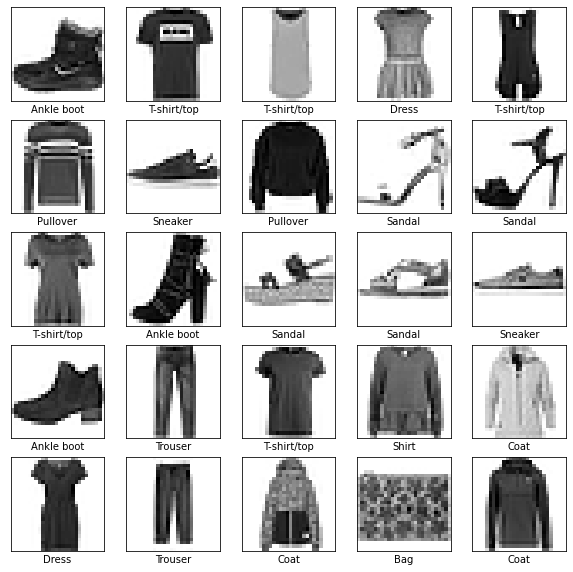

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo e depois compilar o modelo.

Aqui vamos usar um modelo sequencial, mas para arquiteturas mais complexas existe a opção de usar um modelo funcional.

Para saber mais: https://www.brutalk.com/fr/nouvelles/brutalk-blog/voir/como-usar-a-api-funcional-keras-para-aprendizado-profundo-60471841d2518

https://keras.io/guides/sequential_model/

https://keras.io/guides/functional_api/




### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema em questão.

Muito do *deep learning* consiste em encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [ ]:
model_simple = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (28 x 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais totalmente conectadas. A primeira camada `Dense` tem 128 neurônios. A segunda (e última) camada é uma *softmax*  de 10 neurônios que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada neurônio contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão preciso o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para a direção certa. Veja mais em: https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [ ]:
model_simple.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',#Use esta função de perda quando houver duas ou mais classes de rótulos inteiros
  metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [ ]:
model_simple.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5001 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

À medida que o modelo treina, as métricas loss e acurácia são mostradas.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [ ]:
test_loss, test_acc = model_simple.evaluate(test_images,  test_labels, verbose=2) #aqui ele retorna apenas as métricas passadas ao fazer o compile

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3564 - accuracy: 0.8734

Test accuracy: 0.8733999729156494


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

In [ ]:
from sklearn import metrics

y_pred1 = model_simple.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print(metrics.classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.74      0.83      0.79      1000
           3       0.93      0.80      0.86      1000
           4       0.84      0.73      0.78      1000
           5       0.94      0.98      0.96      1000
           6       0.66      0.73      0.69      1000
           7       0.95      0.93      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [ ]:
predictions = model_simple.predict(test_images)

Aqui, o modelo previu que a *label* de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [ ]:
predictions[0]

array([2.5684494e-11, 1.6874201e-12, 2.4164446e-12, 1.3864607e-14,
       4.1763086e-12, 8.2107463e-06, 3.2525549e-09, 1.0033013e-04,
       2.9293382e-10, 9.9989140e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [ ]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [ ]:
test_labels[0]

9

## Ajustando hiperparâmetros

Original: https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=pt-br


In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 3.1 MB/s 


In [ ]:
import keras_tuner as kt

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28))) #entrada

  # Tune the number of units in Dense layer
  # Choose an optimal value between 32-512
  hp_units_1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units_1, activation='relu'))
#  hp_units_2 = hp.Int('units2', min_value=32, max_value=512, step=32)
#  model.add(keras.layers.Dense(units=hp_units_2, activation='relu'))

  model.add(keras.layers.Dense(10, activation='softmax')) #saída

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=10)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')}.
""")

Trial 21 Complete [00h 00m 20s]
val_accuracy: 0.8656666874885559

Best val_accuracy So Far: 0.8851666450500488
Total elapsed time: 00h 06m 01s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 320.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_tunning = tuner.hypermodel.build(best_hps)
historico = model_tunning.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[stop_early])

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4967 - accuracy: 0.8251 - val_loss: 0.3917 - val_accuracy: 0.8602
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8644 - val_loss: 0.3692 - val_accuracy: 0.8689
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.8779 - val_loss: 0.3546 - val_accuracy: 0.8682
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3086 - accuracy: 0.8860 - val_loss: 0.3659 - val_accuracy: 0.8658
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2901 - accuracy: 0.8923 - val_loss: 0.3330 - val_accuracy: 0.8793
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2741 - accuracy: 0.8986 - val_loss: 0.3238 - val_accuracy: 0.8813
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2607 - accuracy: 0.9015 - val_loss: 0.3358 - val_accuracy:

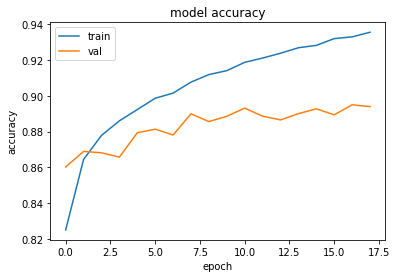

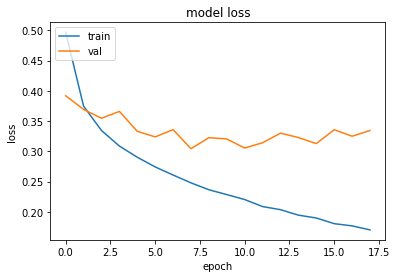

In [ ]:
# summarize history for accuracy
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
eval_result = model_tunning.evaluate(test_images, test_labels)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8852
[test loss, test accuracy]: [0.38233157992362976, 0.885200023651123]


In [ ]:
from sklearn import metrics

y_pred1 = model_tunning.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print(metrics.classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.77      0.84      0.80      1000
           3       0.90      0.89      0.89      1000
           4       0.77      0.85      0.81      1000
           5       0.99      0.94      0.96      1000
           6       0.75      0.66      0.70      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



## Salvando modelo

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model_tunning.save('./saved_model/my_model')

INFO:tensorflow:Assets written to: ./saved_model/my_model/assets


###Carregando modelo a partir do modelo salvo

In [ ]:
new_model = tf.keras.models.load_model('./saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 320)               251200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3210      
Total params: 254,410
Trainable params: 254,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

313/313 - 0s - loss: 0.3823 - accuracy: 0.8852
Restored model, accuracy: 88.52%
(10000, 10)


## Regularizadores

In [ ]:
from tensorflow.keras import regularizers

model_regularizer = keras.Sequential()
model_regularizer.add(keras.layers.Flatten(input_shape=(28, 28))) #entrada
model_regularizer.add(keras.layers.Dense(320, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_regularizer.add(keras.layers.Dropout(0.5)),
model_regularizer.add(keras.layers.Dense(10, activation='softmax')) #saída

model_regularizer.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

historico_regularizer = model_regularizer.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[stop_early])

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6399 - accuracy: 0.7871 - val_loss: 0.5083 - val_accuracy: 0.8251
Epoch 2/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5156 - accuracy: 0.8317 - val_loss: 0.4579 - val_accuracy: 0.8508
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4899 - accuracy: 0.8421 - val_loss: 0.4518 - val_accuracy: 0.8560
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4804 - accuracy: 0.8452 - val_loss: 0.4305 - val_accuracy: 0.8624
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4719 - accuracy: 0.8511 - val_loss: 0.4316 - val_accuracy: 0.8637
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4667 - accuracy: 0.8535 - val_loss: 0.4419 - val_accuracy: 0.8643
Epoch 7/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4641 - accuracy: 0.8539 - val_loss: 0.4439 - val_accuracy:

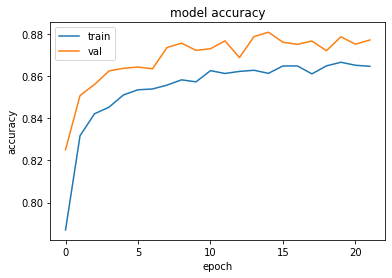

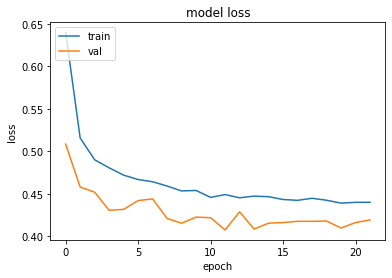

In [ ]:
# summarize history for accuracy
plt.plot(historico_regularizer.history['accuracy'])
plt.plot(historico_regularizer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historico_regularizer.history['loss'])
plt.plot(historico_regularizer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics

y_pred1 = model_regularizer.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print(metrics.classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.78      0.78      1000
           3       0.87      0.87      0.87      1000
           4       0.77      0.81      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.64      0.66      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

